In [1]:
# 1.load the dataset
# 2.feature extraction 
# 3.data visualization 
# 4.data cleaning 
# 5.train test split
# 6.model building 
# 7.model training
# 8.model evaluation
# 9.model saving 
# 10streamlit application deploy

# disable warning
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

df = pd.read_csv(r"D:\datasets\Twitter_sentiemnt Analysis\sentiment.csv", header=None, index_col=[0])
df = df[[2,3]].reset_index(drop=True)
df.columns = ['sentiment', 'comments']
df.head()

,sentiment,comments
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   comments   74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [3]:
df.isnull().sum()

sentiment      0
comments     686
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

sentiment    0
comments     0
dtype: int64

In [5]:
sum(df['comments'].apply(len)>5) , sum(df['comments'].apply(len)<=5)

(72883, 2113)

In [6]:
#we have to filter out 2113 data because it contain length of comments below 5
print(df.shape)
data=df[(df['comments'].apply(len)>5)]
print(data.shape)


(74996, 2)
(72883, 2)


In [7]:
data.sample(10)

,sentiment,comments
18901,Positive,Excited to be back in @ Warcraft today! After ...
6309,Negative,Once again old @amazon packages are delayed so...
72947,Positive,I found this blog service because I won a BETA...
4983,Neutral,"Seriously, these people are wearing masks ever..."
63426,Negative,@EAMaddenNFL @EASPORTS getting their chomps bu...
56183,Positive,I need to start work on how much I play. I'm t...
69779,Positive,What a big smooth ride!
41596,Positive,Battlefield Alliance 4 is still so freaking go...
23695,Irrelevant,Some shit you should just google if you don't ...
34894,Negative,How Ive died here so good many times cause of ...


In [8]:
data['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

<Axes: ylabel='count'>

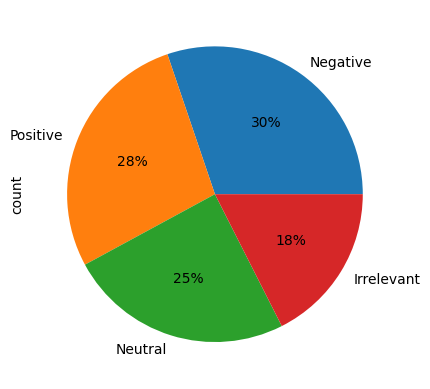

In [9]:
data['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

In [10]:
from wordcloud import WordCloud

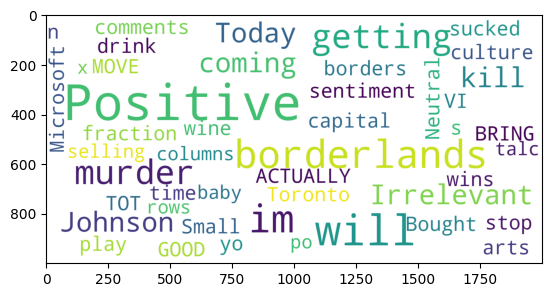

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns 

# wc=WordCloud(background_color='white',max_words=500, max_font_size=40, scale=5).generate(str(data))
# plt.imshow(wc)
# #wordcloud for our data

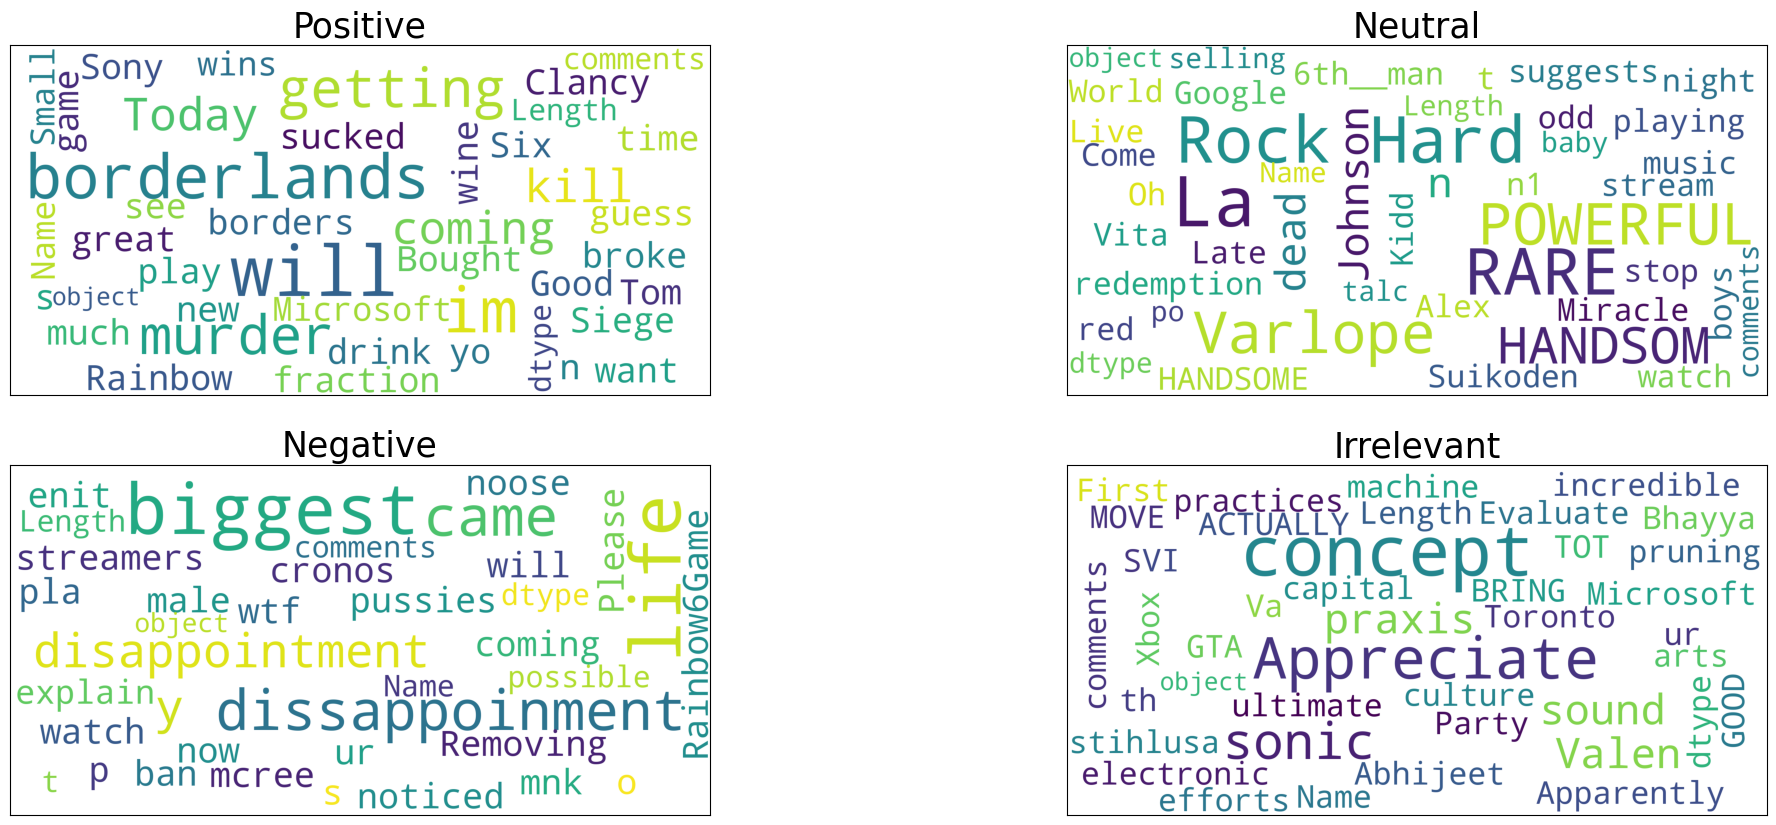

<Figure size 640x480 with 0 Axes>

In [12]:
# plt.figure(figsize=(25,10))

# for index, col in enumerate(df['sentiment'].unique()):
#     plt.subplot(2,2, index+1)
#     # print(col)
#     df1 = df[df['sentiment']==col]
#     data = df1['comments']
#     wordcloud = WordCloud(background_color='white', max_words=500, max_font_size=40, scale=5).generate(str(data))
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(wordcloud)
#     plt.title(col, fontsize=25)
    
# plt.show()
# plt.tight_layout()

In [10]:
data.head()

,sentiment,comments
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
import pandas as pd
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords

# Assuming you have your dataframe named df
# Data Cleaning: lowercase, remove url, html, punctuations, retweet
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

def remove_html_tags(text):
    return re.sub(r'<.*?>', '', text)

def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

def remove_rt(text):
    return re.sub(r'\bRT\b', '', text)

# Apply data cleaning
data['comments'] = data['comments'].apply(lambda x: x.lower())
data['comments'] = data['comments'].apply(lambda x: remove_urls(x))
data['comments'] = data['comments'].apply(lambda x: remove_html_tags(x))
data['comments'] = data['comments'].apply(lambda x: remove_special_chars(x))
data['comments'] = data['comments'].apply(lambda x: remove_rt(x))

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Convert stop_words to a list
stop_words_list = list(stop_words)

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['comments'], df['sentiment'], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(59996,) (15000,)


In [17]:
# Model building with Naive Bayes
clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_list)),
    ('clf', MultinomialNB())
])

# Train the model
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['not', 'there', 'can',
                                             'yourselves', 'needn', 'was',
                                             'she', "that'll", 'themselves',
                                             'shouldn', "mustn't", 'o',
                                             "couldn't", 'mightn', "isn't",
                                             "didn't", 'herself', 'won',
                                             "haven't", 'he', 'if', 'yours',
                                             'doing', 'whom', 'been', 'himself',
                                             'up', 'while', 'here', 'such', ...])),
                ('clf', MultinomialNB())])

In [18]:
# Evaluation for Naive Bayes
predictions = clf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Naive Bayes Accuracy:", accuracy)

Naive Bayes Accuracy: 0.7374666666666667


In [19]:
# Model building with Random Forest
clf2 = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words_list)),
    ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))
])

# Train the model
clf2.fit(X_train, y_train)

# Evaluation for Random Forest
predictions2 = clf2.predict(X_test)
accuracy2 = accuracy_score(y_test, predictions2)
print("Random Forest Accuracy:", accuracy2)

Random Forest Accuracy: 0.9165333333333333


In [21]:
import pickle
# Save the model using pickle
with open('sentiment_model.pkl', 'wb') as model_file:
    pickle.dump(clf2, model_file)

print("Model saved as sentiment_model.pkl")

Model saved as sentiment_model.pkl
